In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
x=iris.data[["petal length (cm)","petal width (cm)"]].values
y=iris.target==0 #label for flower iris setosa

per_clf=Perceptron(random_state=42)
per_clf.fit(x,y)

x_new=[[2,0.5],[3,1]]
print('Predictions of perceptron on x_new:')
y_pred=per_clf.predict(x_new)
print(y_pred)

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
housing=fetch_california_housing()
print('Type of housing:')
print(type(housing))
x_train,x_test,y_train,y_test=train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=42,test_size=0.2)

print('Target values of california housing dataset:')
print(housing.target[:5])
mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
#3 hidden layers with 50 neurons each

pipeline=make_pipeline(StandardScaler(),mlp_reg)#we scale values for gradient descent to converge properly
pipeline.fit(x_train,y_train)

y_pred=pipeline.predict(x_valid)
rmse=mean_squared_error(y_valid,y_pred,squared=False)
print('Obtained rmse(cost function) on predictions of x_valid')
print(rmse)#obtained rmse similar to performance of RandomForestRegressor

#MLPClassifier
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

iris=load_iris(as_frame=False)
print(type(iris))
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42,test_size=0.2)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=42,test_size=0.2)

mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 50, 50), random_state=42,activation='relu',
                        max_iter=1000)# defaukt activation function is ReLU
mlp_clf.fit(x_train,y_train)

y_pred=mlp_clf.predict(x_valid)
print('Unique predictions of classifier on x_valid')
print(pd.Series(y_pred).unique())

y_pred2=mlp_clf.predict(x_test)
print('Value counts of classifier on x_test:')
print(pd.Series(y_pred2).value_counts())

y_test_proba=mlp_clf.predict_proba(x_test)
print('Probability scores for every class of x_test:')
print(y_test_proba[:10])
print('Accuracy score on x_test:')
print(accuracy_score(y_test,y_pred2))


Predictions of perceptron on x_new:
[ True False]
Type of housing:
<class 'sklearn.utils._bunch.Bunch'>
Target values of california housing dataset:
[4.526 3.585 3.521 3.413 3.422]
Obtained rmse(cost function) on predictions of x_valid
0.5501144637946774
<class 'sklearn.utils._bunch.Bunch'>
Unique predictions of classifier on x_valid
[1 0 2]
Value counts of classifier on x_test:
2    12
0    10
1     8
dtype: int64
Probability scores for every class of x_test:
[[2.50915667e-04 9.95390177e-01 4.35890744e-03]
 [9.99891083e-01 1.08916763e-04 3.80852043e-11]
 [4.37077007e-08 4.53025675e-07 9.99999503e-01]
 [2.92086631e-04 9.93488852e-01 6.21906183e-03]
 [1.20283349e-04 9.97067590e-01 2.81212653e-03]
 [9.99715309e-01 2.84691215e-04 2.48427011e-10]
 [1.40475911e-03 9.98564591e-01 3.06495940e-05]
 [3.24729517e-05 1.54445921e-02 9.84522935e-01]
 [2.88467098e-04 1.25691533e-01 8.74019999e-01]
 [3.25359908e-04 9.99585893e-01 8.87466414e-05]]
Accuracy score on x_test:
0.9666666666666667


In [2]:
import tensorflow as tf
#keras can be used to fetch datasets
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(x_train_full,y_train_full),(x_test_full,y_test_full)=fashion_mnist

print('Fashion MNIST dataset shape of x_train_full:')
print(x_train_full.shape)
#there are 60000 images, each image is 28x28 pixels

print('Fashion MNIST dataset shape of y_train_full:')
print(y_train_full.shape)

print('Fashion MNIST dataset shape of x_test_full:')
print(x_test_full.shape)

print('Fashion MNIST dataset shape of y_test_full:')
print(y_test_full.shape)

print('Labels of fashion MNIST:')
print(pd.Series(y_train).unique())
x_train,y_train=x_train_full[:-5000],y_train_full[:-5000]
x_valid,y_valid=x_train_full[-5000:],y_train_full[-5000:]#last 5000 images assigned for validation set

#each image in keras dataset is repped as 28x28 array whereas in scikit it was 1 D array of length 784 
print('Datatype of pixel intensities')
print(x_train.dtype)
#uint8 means numbers from 0 to 255 used to represent intensities

x_train,x_valid,x_test=x_train/255.,x_valid/255.,x_test/255.
#scales intensities to 0-1 range, converts them to floats

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print('Class name of first item in training set:')
print(class_names[y_train[0]])

tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))#dimensions of every instance
model.add(tf.keras.layers.Flatten())#flattens each instance to 1D array(784 features)
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))#100 neurons for every class

#ALTER way of creating same neural net

model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]),
                          tf.keras.layers.Dense(300,activation='relu'),
                          tf.keras.layers.Dense(100,activation='relu'),
                          tf.keras.layers.Dense(10,activation='softmax')])


print('Summary of created neural net:')
print(model.summary())#param represents number of connections between neuron and corresponding input(each neuron takes all
#input features of previous layer as input)

print('Layers of given model:')
print(model.layers)

hidden_layer_1=model.layers[1]
print('Name of hidden layer:')
print(hidden_layer_1.name)

print(model.get_layer(hidden_layer_1.name) is hidden_layer_1)

Fashion MNIST dataset shape of x_train_full:
(60000, 28, 28)
Fashion MNIST dataset shape of y_train_full:
(60000,)
Fashion MNIST dataset shape of x_test_full:
(10000, 28, 28)
Fashion MNIST dataset shape of y_test_full:
(10000,)
Labels of fashion MNIST:
[2 1 0]
Datatype of pixel intensities
uint8
Class name of first item in training set:
Ankle boot
Summary of created neural net:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
   

In [3]:
#there is a bias term for every neuron
weights,biases=hidden_layer_1.get_weights()
print('Weights associated with hidden layer:')
print(weights)
#each array represents weights for a particular feature for all neurons 
print('Biases for first 10 neurons')
print(biases[:10])
print('Dimensions for weights:')
print(weights.shape)
#These are the initialized weights and biases, model hasn't been trained yet

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics='accuracy')
#sgd means model will use backpropogation

history=model.fit(x_train,y_train,epochs=20,validation_data=[x_valid,y_valid])
#epochs=30 specifies how many times the model is trained over the data, batch_size represents no of training instances
#taken at a time for training for every epoch(default batch_size=32)
history
#therea are 1719 batches,accuracy incrementally increases for every epoch

Weights associated with hidden layer:
[[ 0.04344737 -0.01361863 -0.05533469 ...  0.05904871 -0.0185616
  -0.02847239]
 [ 0.05921046 -0.03366253  0.03579045 ...  0.02229425 -0.03251242
  -0.01804087]
 [ 0.06829582  0.0457387  -0.04391625 ... -0.03190552 -0.05328345
  -0.0179178 ]
 ...
 [-0.0626476   0.0502848  -0.03034826 ...  0.06635843 -0.0225518
   0.06816584]
 [-0.00925349  0.04350906 -0.04219743 ... -0.00133353  0.01626945
  -0.05347979]
 [ 0.00490952  0.0056527  -0.06647557 ... -0.06850533  0.00989751
   0.01102126]]
Biases for first 10 neurons
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Dimensions for weights:
(784, 300)
Epoch 1/20
1719/1719 [==============================] - 20s 4ms/step - loss: 0.7106 - accuracy: 0.7628 - val_loss: 0.5012 - val_accuracy: 0.8292
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4861 - accuracy: 0.8308 - val_loss: 0.4604 - val_accuracy: 0.8344
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4395 - acc

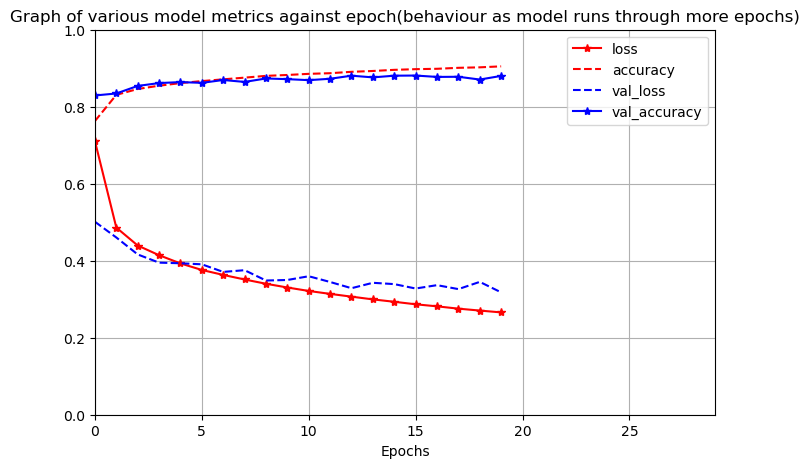

Evaluation metrics on test set:
313/313 [==============================] - 1s 3ms/step - loss: 64.8714 - accuracy: 0.8442
[64.87142181396484, 0.8442000150680542]
Prediction on x_new
1/1 [==============================] - 0s 192ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Class label prediction on x_new(not probabiliites for every class:)
[9 2 1 1 6]
Names of corresponding garments:
['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epochs',
                                  style=['r-*','r--','b--','b-*'])
plt.title('Graph of various model metrics against epoch(behaviour as model runs through more epochs)')
plt.show()
#red line represents metrics for training data, blue line represents metrics for validation data
#validation loss still going down so model not converged yet, can train again
#calling fit again will continue training from where it left off

print('Evaluation metrics on test set:')
print(model.evaluate(x_test_full,y_test_full))

x_new=x_test_full[:5]
print('Prediction on x_new')
y_proba=model.predict(x_new)
print(y_proba)

y_pred=y_proba.argmax(axis=-1)
#for each instance, it finds the class label having the highest probability

print('Class label prediction on x_new(not probabiliites for every class:)')
print(y_pred)

print('Names of corresponding garments:')
print(np.array(class_names)[y_pred])

In [5]:
#MLP regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
data=fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=x_train.shape[1:])
#x_train.shape contains (no of instances,no of features), for model no of instances=batch_size
#Normalization scales features
model=tf.keras.Sequential([norm_layer,
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(50,activation='relu'),
                          tf.keras.layers.Dense(1)])
#in final layer only 1 output neuron as this is regression task where we are predicting only 1 value
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
norm_layer.adapt(x_train)
#need to do above step for standard scaling
history=model.fit(x_train,y_train,epochs=20,validation_data=[x_valid,y_valid])
print('Evaluation metrics of test dataset:')
print(model.evaluate(x_test,y_test))

Epoch 1/20
413/413 [==============================] - 3s 5ms/step - loss: 0.7970 - root_mean_squared_error: 0.8927 - val_loss: 0.4343 - val_root_mean_squared_error: 0.6590
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3842 - root_mean_squared_error: 0.6198 - val_loss: 0.3779 - val_root_mean_squared_error: 0.6147
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3537 - root_mean_squared_error: 0.5947 - val_loss: 0.4131 - val_root_mean_squared_error: 0.6427
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3379 - root_mean_squared_error: 0.5813 - val_loss: 0.4048 - val_root_mean_squared_error: 0.6362
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3221 - root_mean_squared_error: 0.5675 - val_loss: 0.3508 - val_root_mean_squared_error: 0.5923
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 0.3082 - root_mean_squared_error: 0.5551 - val_loss: 0.3461 - val_

In [6]:
print('Target values of claifornia housing dataset:')
print(y[:10])
#WIDE AND DEEP MODEL: connects inputs directly to output layer for simple patterns+ through hidden layers for complex patterns
tf.random.set_seed(42)
normalization_layer=tf.keras.layers.Normalization()
hidden_layer_1=tf.keras.layers.Dense(30,activation='relu')
hidden_layer_2=tf.keras.layers.Dense(30,activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input1=tf.keras.layers.Input(shape=x_train.shape[1:])
normalized=normalization_layer(input1) 
hidden1=hidden_layer_1(normalized)#normalized represents or contains outputs of Input layer after normalization
hidden2=hidden_layer_2(hidden1)
concat=concat_layer([input1,hidden2])#connects inputs to output of hidden2 layer
output=output_layer(concat)

model=tf.keras.Model(inputs=[input1],outputs=[output])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
normalization_layer.adapt(x_train)
#same process, compile the model, adapt normalization layer, fit model, evaluate
#history=model.fit(x_train,y_train,epochs=30,validation_data=[x_valid,y_valid])

#if you want a subset of features for wide path and a subset of features for deep path
x_train_wide,x_train_deep=x_train[:,:5],x_train[:,2:]
x_valid_wide,x_valid_deep=x_valid[:,:5],x_valid[:,2:]
x_test_wide,x_test_deep=x_test[:,:5],x_test[:,2:]

input_layer1=tf.keras.layers.Input(shape=[5])
input_layer2=tf.keras.layers.Input(shape=[6])
norm_wide=tf.keras.layers.Normalization()
norm_deep=tf.keras.layers.Normalization()

norm_w=norm_wide(input_layer1)
norm_d=norm_deep(input_layer2)
hidden_layer_1=tf.keras.layers.Dense(30,activation='relu')(norm_d)
hidden_layer_2=tf.keras.layers.Dense(30,activation='relu')(hidden_layer_1)

concat=tf.keras.layers.Concatenate()([norm_w,hidden_layer_2])
output=tf.keras.layers.Dense(1)(concat)
#output layer has only 1 neuron as it is regression task and no activation function

#IN CASE OF AUXILLARY OUTPUT:
aux_output=tf.keras.layers.Dense(1)(hidden_layer_2)

model=tf.keras.Model(inputs=[input_layer1,input_layer2],outputs=[output,aux_output])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=['mse','mse'],loss_weights=(0.9,0.1),optimizer=optimizer,metrics=['RootMeanSquaredError'])
#the loss weight for main regression task is assigned more weight, for auxillary task it is lesser
norm_wide.adapt(x_train[:,:5])
norm_deep.adapt(x_train[:,2:])
history=model.fit([x_train_wide,x_train_deep],[y_train,y_train],epochs=20,validation_data=((x_valid_wide,x_valid_deep),
                                                                                           (y_valid,y_valid)))

print('Evaluation metrics of above auxillary architecture on test set:')
eval_results=model.evaluate((x_test_wide,x_test_deep),(y_test,y_test))
weighted_sum_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results

Target values of claifornia housing dataset:
[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
Epoch 1/20
413/413 [==============================] - 4s 6ms/step - loss: 1.6825 - dense_15_loss: 1.6838 - dense_16_loss: 1.6714 - dense_15_root_mean_squared_error: 1.2976 - dense_16_root_mean_squared_error: 1.2928 - val_loss: 0.7957 - val_dense_15_loss: 0.7853 - val_dense_16_loss: 0.8891 - val_dense_15_root_mean_squared_error: 0.8862 - val_dense_16_root_mean_squared_error: 0.9429
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.6069 - dense_15_loss: 0.6019 - dense_16_loss: 0.6524 - dense_15_root_mean_squared_error: 0.7758 - dense_16_root_mean_squared_error: 0.8077 - val_loss: 0.5682 - val_dense_15_loss: 0.5612 - val_dense_16_loss: 0.6315 - val_dense_15_root_mean_squared_error: 0.7491 - val_dense_16_root_mean_squared_error: 0.7947
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4903 - dense_15_loss: 0.4832 - dense_16_loss: 0.5

In [7]:
#Predictions of above auxillary model of wide and deep style nn
x_new_wide,x_new_deep=x_test_wide[:3],x_test_deep[:3]
y_pred=model.predict((x_new_wide,x_new_deep))
print('Main prediction:')
print(y_pred[0])
print('Auxillary prediction:')
print(y_pred[1])
model.save('keras_aux_model',save_format='tf')
#To load this saved model use: tf.keras.models.load_model('keras_aux_model')

checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_checkpoints",save_weights_only=True)
#saves checkpoints of model at regular intervals during training, vy default at end of every epoch(compare to model.save(...))
#history=model.fit([...],callbacks=[checkpoint_cb])

checkpoint_valid=tf.keras.callbacks.ModelCheckpoint('my_checks',save_best_only=True)
#saves model only when it performance is best on validation set. training continues even after saving

early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#interrupts training when no progress measured on validation set for at least 10 epochs(patience), restores best weights in end

#CUSTOM CALLBACKS
class val_train_loss_ratio(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio=logs['val_loss']/logs['loss']
        #logs is a dictionary that contains metrics, val_loss represents loss for for validation set, loss reps loss for train
        print(f"Epoch: {epoch}, ratio :{ratio}")

history=model.fit([x_train_wide,x_train_deep],[y_train,y_train],epochs=20,validation_data=((x_valid_wide,x_valid_deep),
                                                                                           (y_valid,y_valid)),
                  callbacks=[val_train_loss_ratio()])

1/1 [==============================] - 0s 268ms/step
Main prediction:
[[0.56421936]
 [0.9339292 ]
 [3.651528  ]]
Auxillary prediction:
[[0.5747894]
 [0.7256931]
 [3.3973105]]
INFO:tensorflow:Assets written to: keras_aux_model\assets
Epoch 1/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3327 - dense_15_loss: 0.3267 - dense_16_loss: 0.3874 - dense_15_root_mean_squared_error: 0.5716 - dense_16_root_mean_squared_error: 0.6224 - val_loss: 0.3482 - val_dense_15_loss: 0.3398 - val_dense_16_loss: 0.4238 - val_dense_15_root_mean_squared_error: 0.5829 - val_dense_16_root_mean_squared_error: 0.6510
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3285 - dense_15_loss: 0.3225 - dense_16_loss: 0.3829 - dense_15_root_mean_squared_error: 0.5679 - dense_16_root_mean_squared_error: 0.6187 - val_loss: 0.3489 - val_dense_15_loss: 0.3414 - val_dense_16_loss: 0.4159 - val_dense_15_root_mean_squared_error: 0.5843 - val_dense_16_root_mean_squared_error: 0.6449

Epoch 14/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3119 - dense_15_loss: 0.3064 - dense_16_loss: 0.3615 - dense_15_root_mean_squared_error: 0.5536 - dense_16_root_mean_squared_error: 0.6013 - val_loss: 0.3256 - val_dense_15_loss: 0.3186 - val_dense_16_loss: 0.3878 - val_dense_15_root_mean_squared_error: 0.5645 - val_dense_16_root_mean_squared_error: 0.6228
Epoch 15/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3144 - dense_15_loss: 0.3088 - dense_16_loss: 0.3642 - dense_15_root_mean_squared_error: 0.5557 - dense_16_root_mean_squared_error: 0.6035 - val_loss: 0.3761 - val_dense_15_loss: 0.3717 - val_dense_16_loss: 0.4153 - val_dense_15_root_mean_squared_error: 0.6097 - val_dense_16_root_mean_squared_error: 0.6444
Epoch 16/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3148 - dense_15_loss: 0.3096 - dense_16_loss: 0.3614 - dense_15_root_mean_squared_error: 0.5564 - dense_16_root_mean_squared_error: 0.6011 - val_loss: 0.

In [8]:
from pathlib import Path
from time import strftime

#first we modify program so that it outputs visualization data to special binary log files called event files
#Tensorboard monitors log files abd picks up on changes in visualization data

def get_run_log(root_logdir='my_logs'):
    return Path(root_logdir)/strftime("run_%Y_%m_%d_%H_%M_%S")
run_log_dir=get_run_log()

tensorboard_cb=tf.keras.callbacks.TensorBoard(run_log_dir,profile_batch=(100,200))
#profile batch=(100,200) 100 is index of first batch 200 is index of last batch, info from these batches used for
#additional performance analysis, used for identifying CPU GPU utilization

history=model.fit([x_train_wide,x_train_deep],[y_train,y_train],epochs=20,validation_data=((x_valid_wide,x_valid_deep),
                                                                        (y_valid,y_valid)),callbacks=[tensorboard_cb])
#here the callback logs metrics for every epoch,aiding in visualization
%load_ext tensorboard
%tensorboard --logdir=./my_logs


Epoch 1/20
413/413 [==============================] - 7s 15ms/step - loss: 0.3069 - dense_15_loss: 0.3014 - dense_16_loss: 0.3562 - dense_15_root_mean_squared_error: 0.5490 - dense_16_root_mean_squared_error: 0.5969 - val_loss: 0.3336 - val_dense_15_loss: 0.3274 - val_dense_16_loss: 0.3900 - val_dense_15_root_mean_squared_error: 0.5722 - val_dense_16_root_mean_squared_error: 0.6245
Epoch 2/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3055 - dense_15_loss: 0.3002 - dense_16_loss: 0.3534 - dense_15_root_mean_squared_error: 0.5479 - dense_16_root_mean_squared_error: 0.5945 - val_loss: 0.3288 - val_dense_15_loss: 0.3229 - val_dense_16_loss: 0.3826 - val_dense_15_root_mean_squared_error: 0.5682 - val_dense_16_root_mean_squared_error: 0.6186
Epoch 3/20
413/413 [==============================] - 2s 5ms/step - loss: 0.3067 - dense_15_loss: 0.3014 - dense_16_loss: 0.3546 - dense_15_root_mean_squared_error: 0.5490 - dense_16_root_mean_squared_error: 0.5955 - val_loss: 0.32

Reusing TensorBoard on port 6006 (pid 14980), started 1:05:36 ago. (Use '!kill 14980' to kill it.)

In [9]:
#!kill 14980
%tensorboard --logdir=./my_logs --port 6006


Reusing TensorBoard on port 6006 (pid 13348), started 0:53:15 ago. (Use '!kill 13348' to kill it.)